## Phase Diversity with smoothing
Previously, in this [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_PD-smoothing.ipynb), the smoothing was done only outside the support, thus couldn't remove the high-frequency components in the aperture. Here we explore the contrary situation: everything is equally filtered

In [8]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## Input (true images)
#### 10x defocusing
As usual, maximum 20% aberrations in ONLY phase. 

In [9]:
coeff1 = [0]*15 
coeff2 = [0,0,0.4,1,0,0,3,0,0.9,1,0,1.5,0,0.4,0]
P,P_,F,F_ = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2)

In [10]:
defocus = 10
[P10,P_10,F10,F_10], \
[D10,D_10,Fd10,F_d10] = true_imgs_defocus(Npix=128,oversamp=2,
                                          coeff1=coeff1,
                                          coeff2=coeff2,
                                          defocus=defocus)

In [11]:
test10 = PR(pup=P10,foc=F10,oversamp=2)
test10(foc_defoc=[F10,Fd10])

#### Inputs

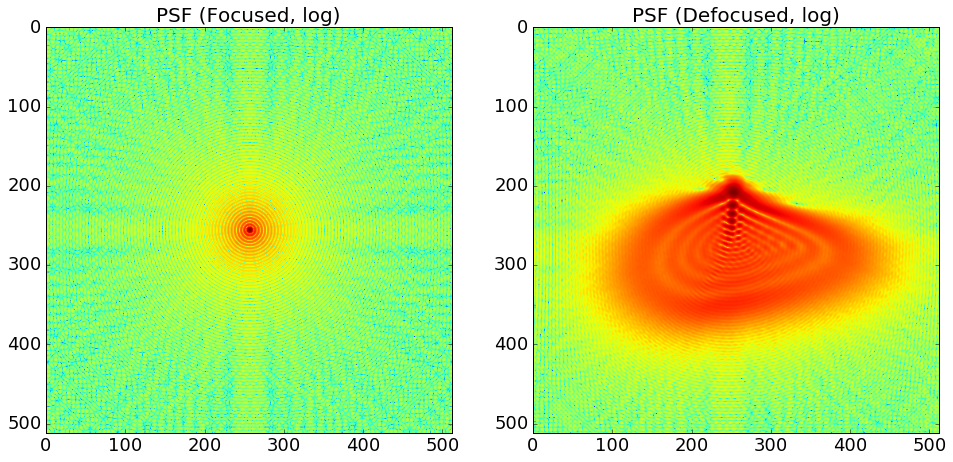

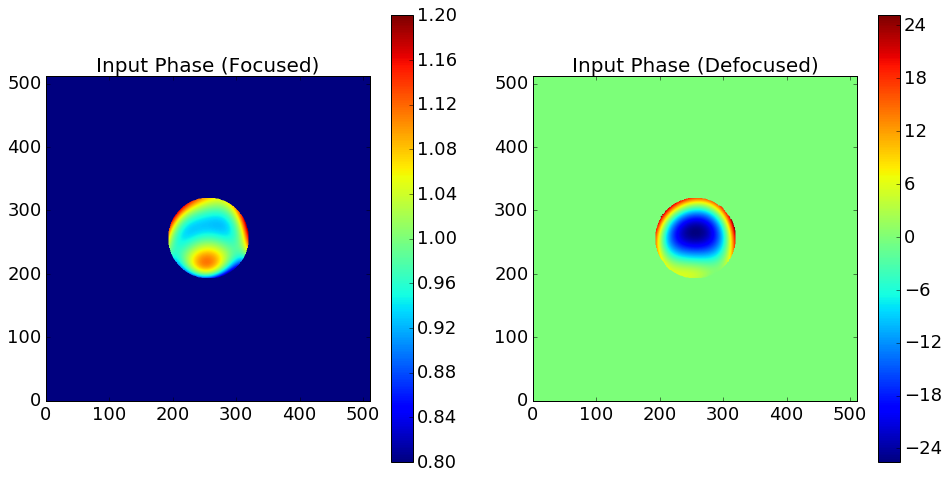

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(np.sqrt(test10.foc_foc),norm=LogNorm()); plt.title('PSF (Focused, log)')
plt.subplot(122); plt.imshow(np.sqrt(test10.foc_def),norm=LogNorm()); plt.title('PSF (Defocused, log)')

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(unwrap_phase(np.angle(P_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Focused)'); plt.clim(0.8,1.2)
plt.subplot(122); plt.imshow(unwrap_phase(np.angle(D_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Defocused)')

### Run
#### 1. Random initial guess with default $\alpha$ evolution

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


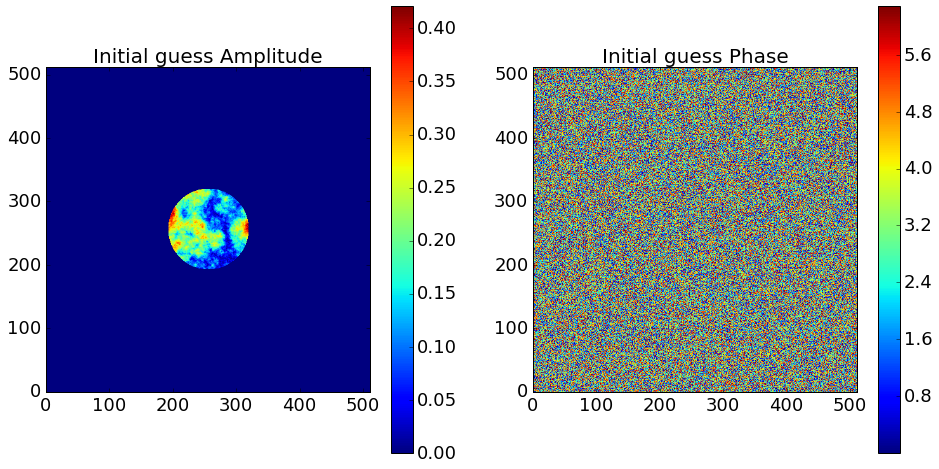

Current filter:


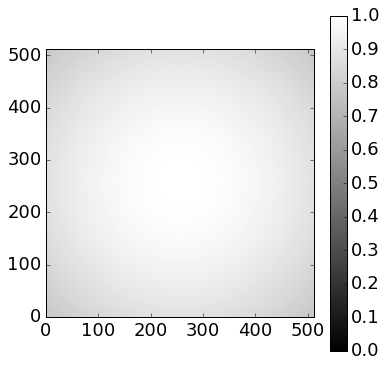

Current step                    : 0
Error (of focused Fourier plane): 1.20e-02
Current step                    : 100
Error (of focused Fourier plane): 4.38e-03
Current filter:


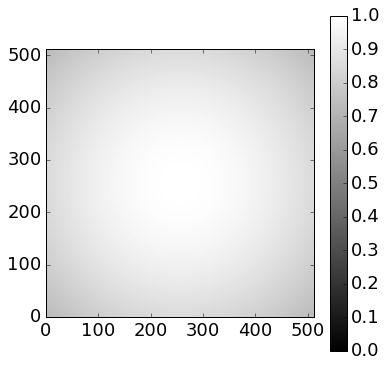

Current step                    : 200
Error (of focused Fourier plane): 4.38e-03
Current step                    : 300
Error (of focused Fourier plane): 4.38e-03
Current filter:


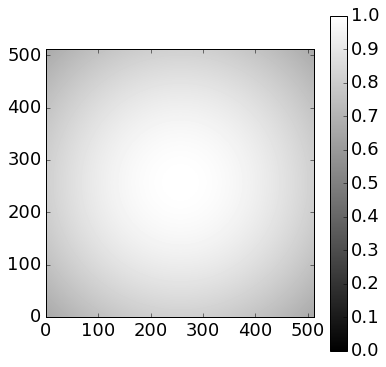

Current step                    : 400
Error (of focused Fourier plane): 4.37e-03
Current step                    : 500
Error (of focused Fourier plane): 4.36e-03
Current filter:


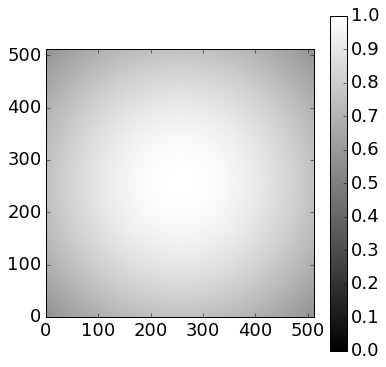

Current step                    : 600
Error (of focused Fourier plane): 4.34e-03
Current step                    : 700
Error (of focused Fourier plane): 4.34e-03
Current filter:


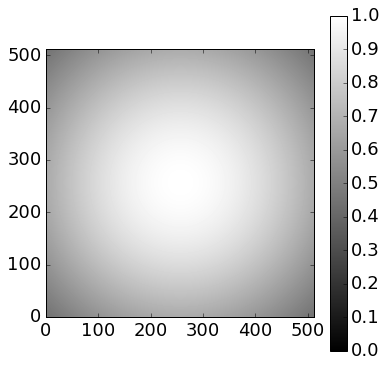

Current step                    : 800
Error (of focused Fourier plane): 4.31e-03
Current step                    : 900
Error (of focused Fourier plane): 4.31e-03
Current filter:


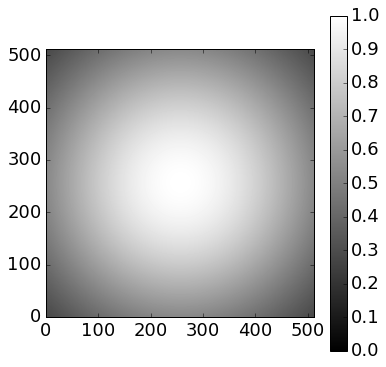

Current step                    : 1000
Error (of focused Fourier plane): 4.27e-03
Current step                    : 1100
Error (of focused Fourier plane): 4.26e-03
Current filter:


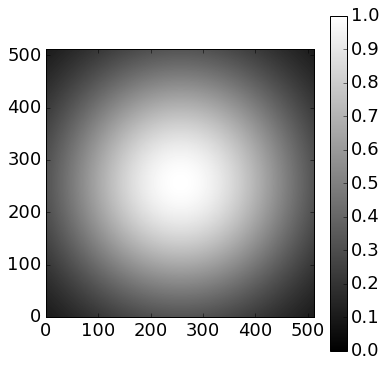

Current step                    : 1200
Error (of focused Fourier plane): 4.21e-03
Current step                    : 1300
Error (of focused Fourier plane): 4.20e-03
Current filter:


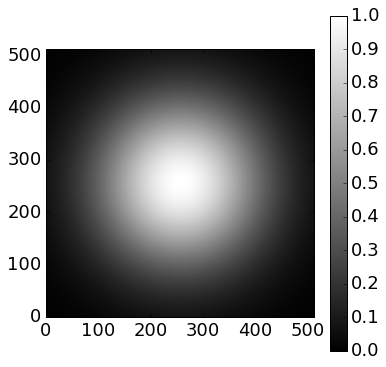

Current step                    : 1400
Error (of focused Fourier plane): 4.12e-03
Current step                    : 1500
Error (of focused Fourier plane): 4.10e-03
Current filter:


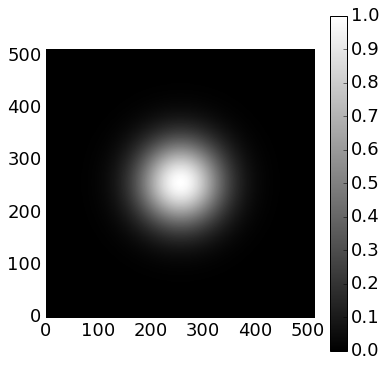

Current step                    : 1600
Error (of focused Fourier plane): 4.01e-03
Current step                    : 1700
Error (of focused Fourier plane): 3.87e-03
-----------------------
First iteration error: 1.20e-02
Final step : 1800
Final Error: 3.91e-03


In [13]:
PD_ER_pup10, \
PD_ER_foc10, \
PD_ER_errlist10, \
PD_ER_pup10_proj,\
PD_ER_errpuplist10 = test10.PD_ER_smoothing(defocus=defocus,smoo_in=True)

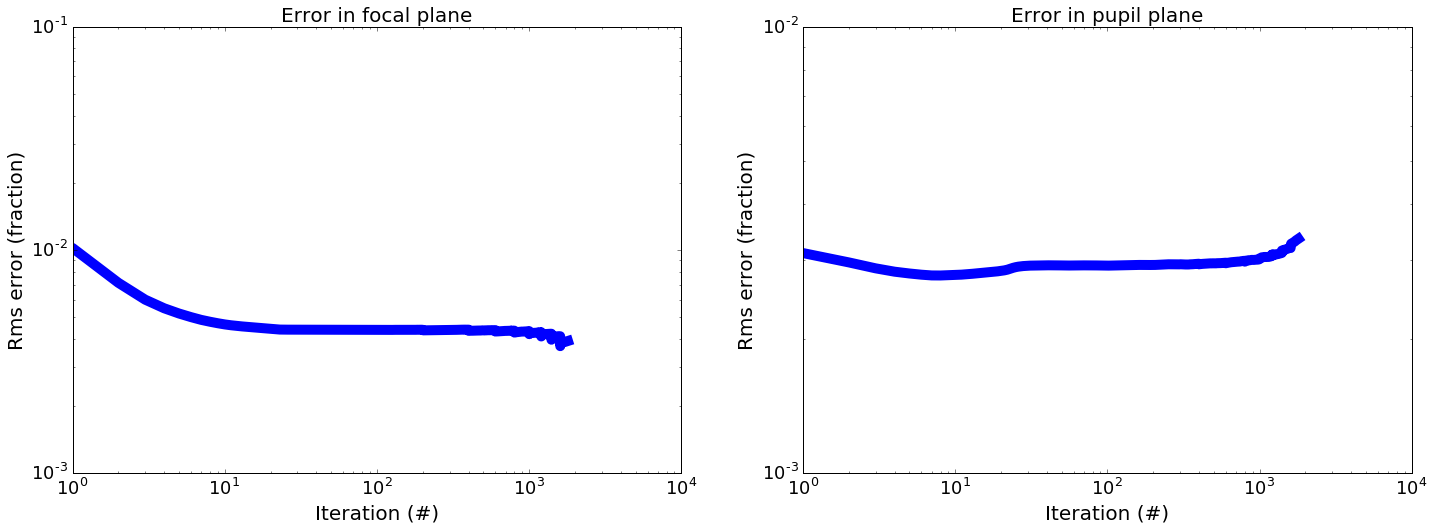

In [14]:
plot_errlist(PD_ER_errlist10,PD_ER_errpuplist10)

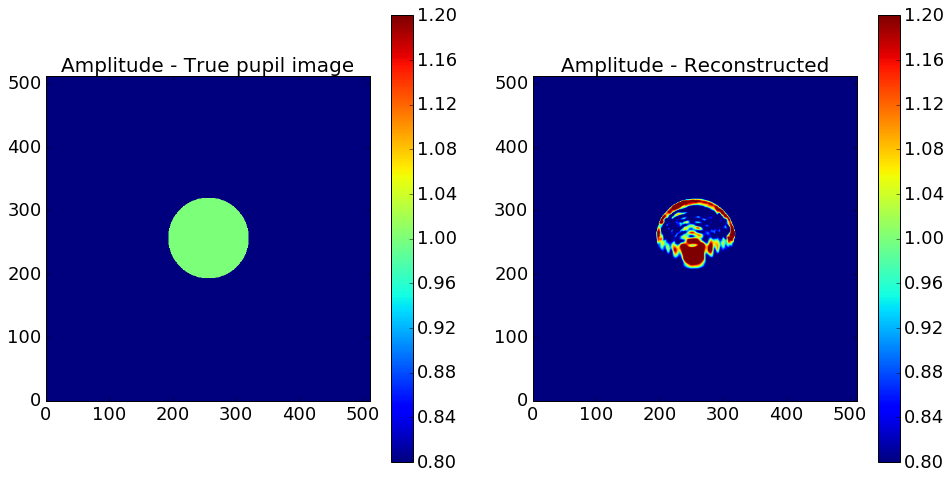

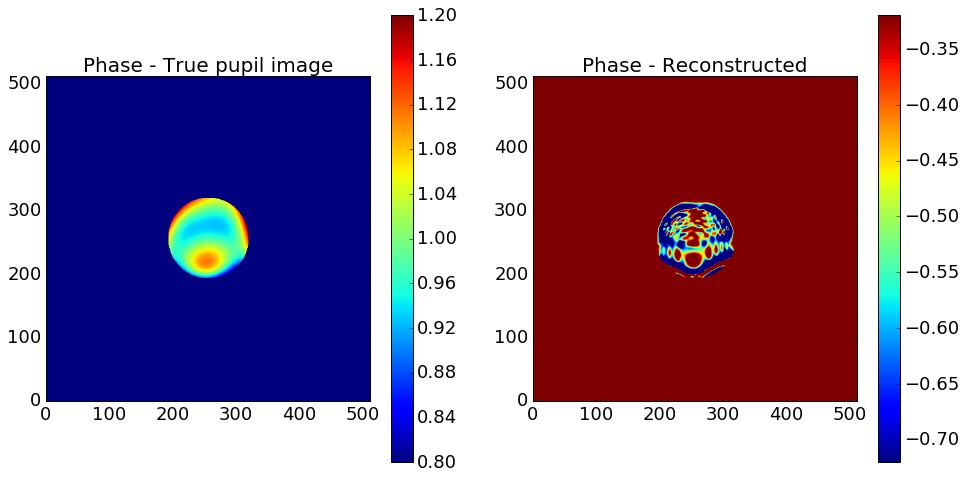

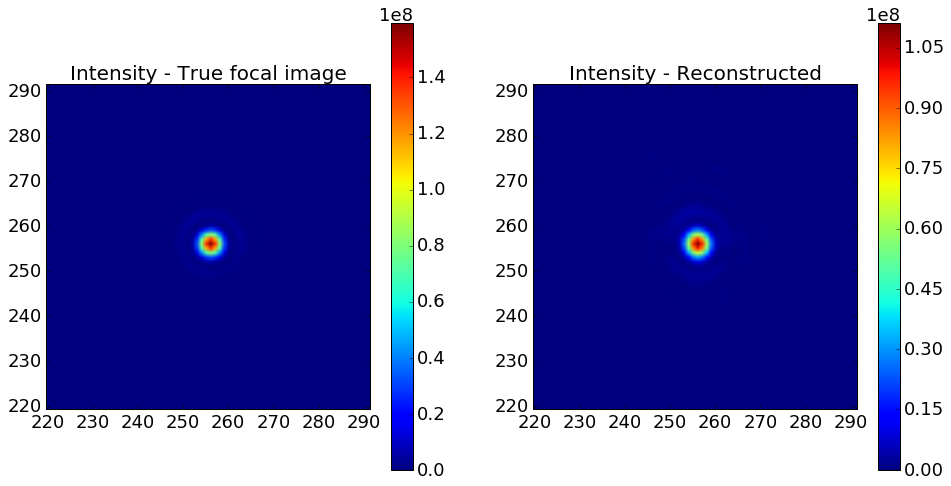

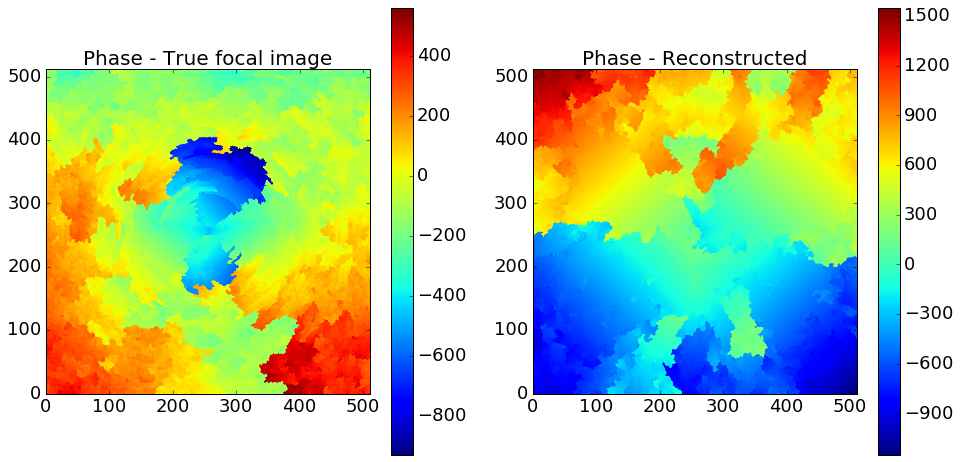

In [15]:
plot_recon(P_10,F_10,PD_ER_pup10_proj,PD_ER_foc10,recons_clim=True)

## Forcing amplitude to be zero

In [16]:
test1 = PR(pup=P10,foc=F10,oversamp=2)
test1(foc_defoc=[F10,Fd10])

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


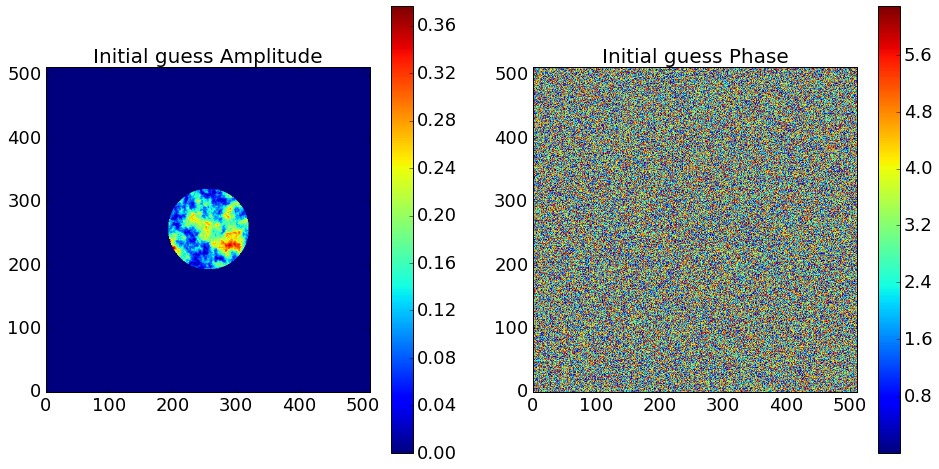

Current filter:


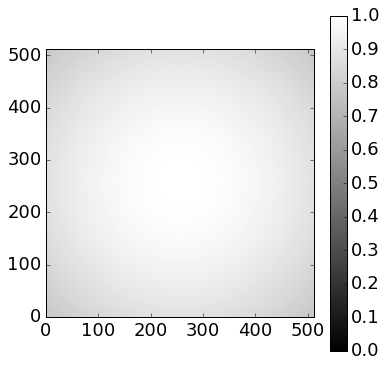

Current step                    : 0
Error (of focused Fourier plane): 1.21e-02
Current step                    : 100
Error (of focused Fourier plane): 5.03e-03
Current filter:


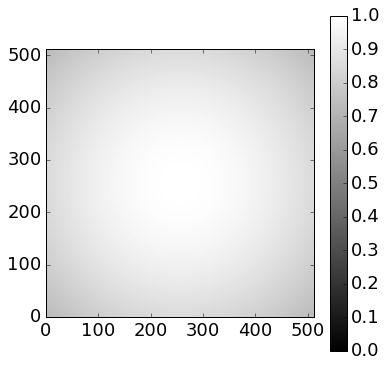

Current step                    : 200
Error (of focused Fourier plane): 4.97e-03
Current step                    : 300
Error (of focused Fourier plane): 5.04e-03
Current filter:


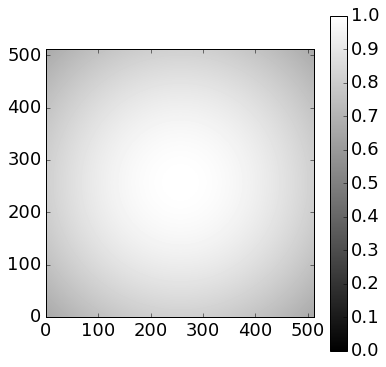

Current step                    : 400
Error (of focused Fourier plane): 4.95e-03
Current step                    : 500
Error (of focused Fourier plane): 5.02e-03
Current filter:


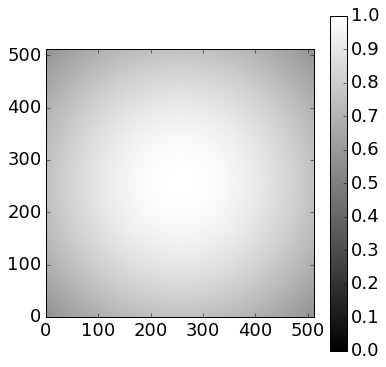

Current step                    : 600
Error (of focused Fourier plane): 4.93e-03
Current step                    : 700
Error (of focused Fourier plane): 4.99e-03
Current filter:


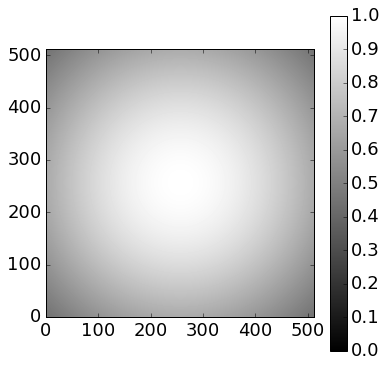

Current step                    : 800
Error (of focused Fourier plane): 4.88e-03
Current step                    : 900
Error (of focused Fourier plane): 4.94e-03
Current filter:


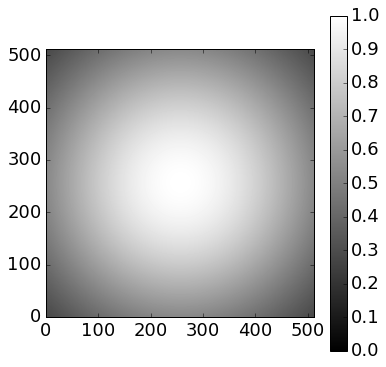

Current step                    : 1000
Error (of focused Fourier plane): 4.81e-03
Current step                    : 1100
Error (of focused Fourier plane): 4.86e-03
Current filter:


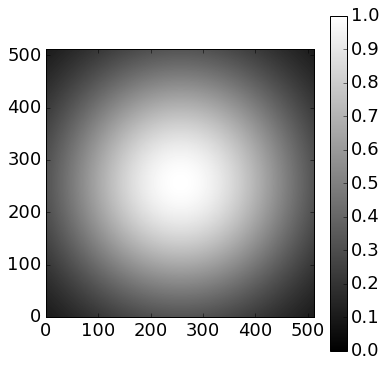

Current step                    : 1200
Error (of focused Fourier plane): 4.69e-03
Current step                    : 1300
Error (of focused Fourier plane): 4.74e-03
Current filter:


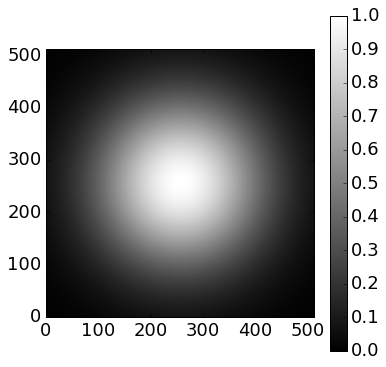

Current step                    : 1400
Error (of focused Fourier plane): 4.51e-03
Current step                    : 1500
Error (of focused Fourier plane): 4.61e-03
Current filter:


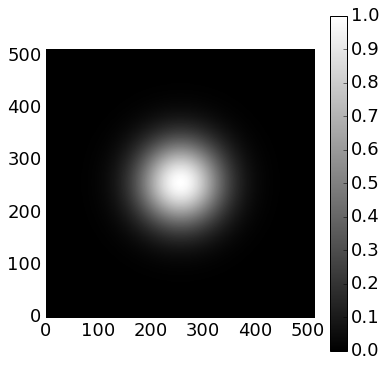

Current step                    : 1600
Error (of focused Fourier plane): 4.25e-03
Current step                    : 1700
Error (of focused Fourier plane): 4.39e-03
-----------------------
First iteration error: 1.21e-02
Final step : 1800
Final Error: 4.63e-03


In [17]:
PD_ER_pup1, \
PD_ER_foc1, \
PD_ER_errlist1, \
PD_ER_pup1_proj,\
PD_ER_errpuplist1 = test1.PD_ER_smoothing(defocus=defocus,
                                          force_only_phase=True,
                                          smoo_in=True)

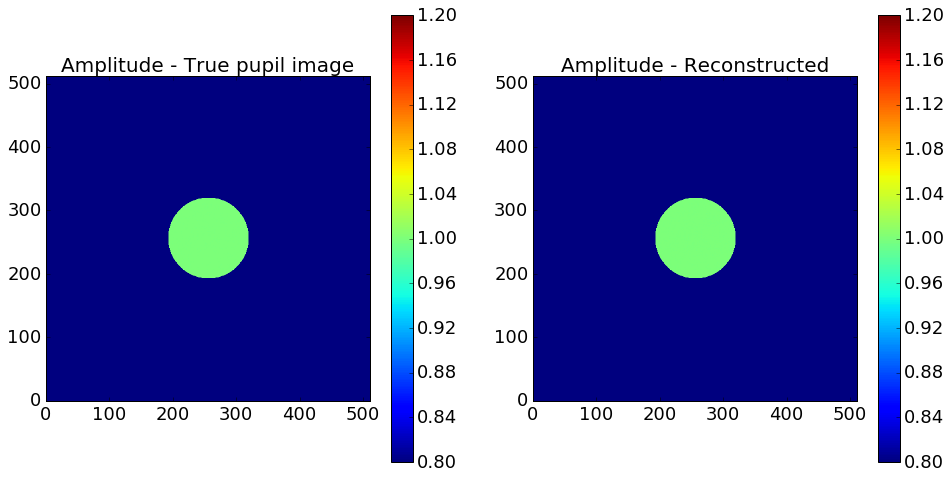

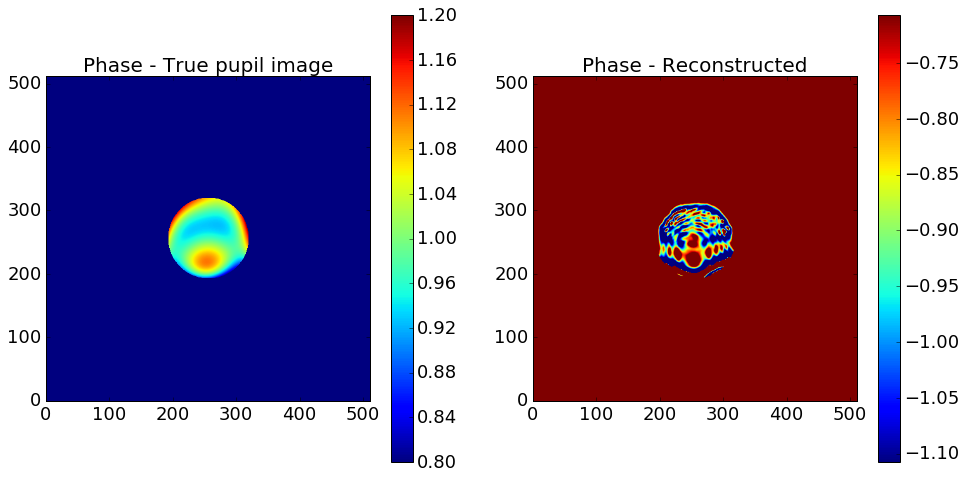

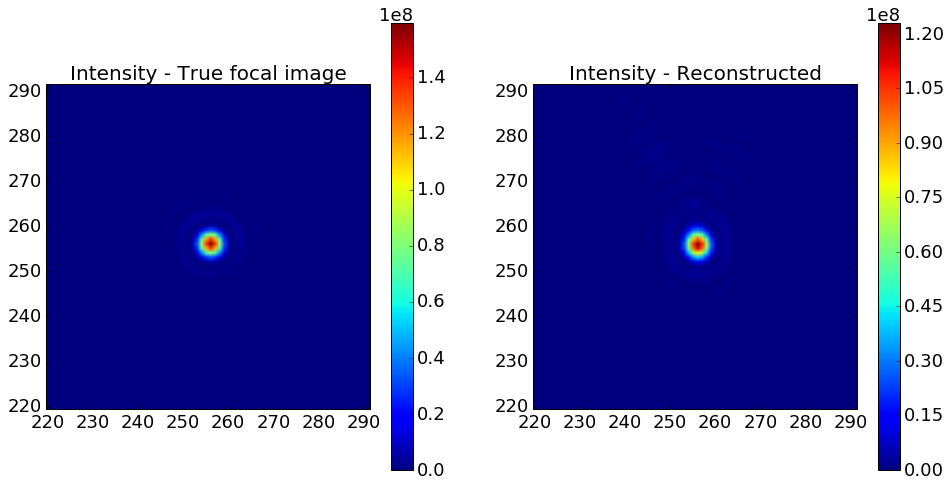

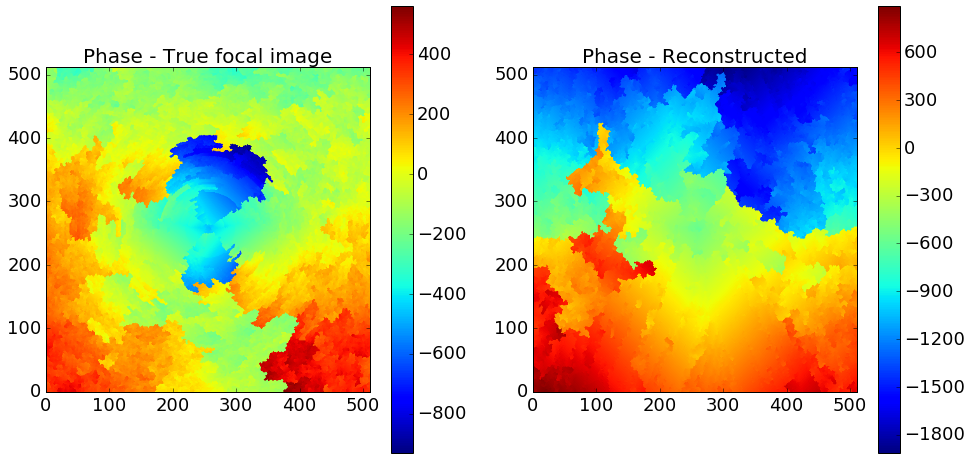

In [20]:
plot_recon(P_10,F_10,PD_ER_pup1_proj,PD_ER_foc1,recons_clim=True)

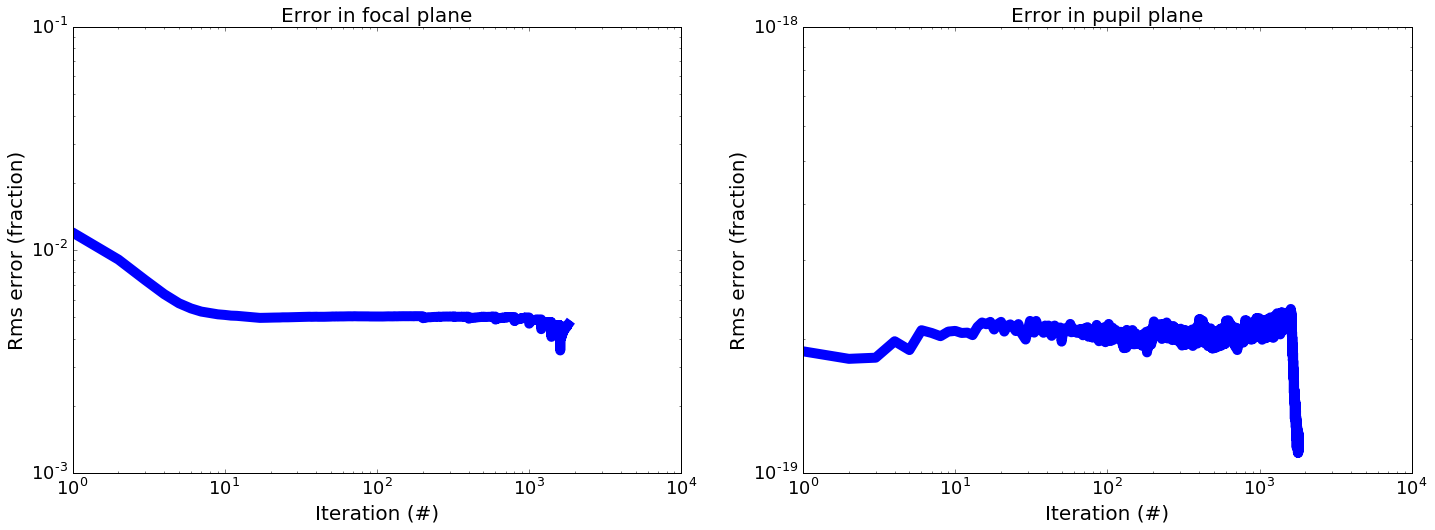

In [19]:
plot_errlist(PD_ER_errlist1,PD_ER_errpuplist1)